NAMA: HIMAM BASHIRAN (2311110055)

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Import Dataset

Soal 1. Lakukan agregasi data

In [2]:
train_1 = pd.read_csv("mouse.csv")
train_2 = pd.read_csv("mouse (1).csv")
train_3 = pd.read_csv("mouse (2).csv")
train_4 = pd.read_csv("mouse (3).csv")
train_5 = pd.read_csv("mouse (4).csv")

train_1['kelas'] = 'amateurs'
train_2['kelas'] = 'amateurs'
train_3['kelas'] = 'pros'
train_4['kelas'] = 'pros'
train_5['kelas'] = 'pros'

In [3]:
df = pd.concat([train_1, train_2, train_3, train_4, train_5], axis=0)
df.head()

,time,mouse_movement,mouse_clicks,kelas
0,0.0,1471.238748,0.00,amateurs
1,1.0,1766.137282,4.00,amateurs
2,2.0,1823.113796,5.00,amateurs
3,3.0,1310.195857,5.50,amateurs
4,4.0,1294.788856,6.75,amateurs


# Data Cleaning dan EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9875 entries, 0 to 1974
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            9875 non-null   float64
 1   mouse_movement  9875 non-null   float64
 2   mouse_clicks    9875 non-null   float64
 3   kelas           9875 non-null   object 
dtypes: float64(3), object(1)
memory usage: 385.7+ KB


In [5]:
#check if any null values
print(df.isnull().sum())

time              0
mouse_movement    0
mouse_clicks      0
kelas             0
dtype: int64


In [6]:
# Melihat total baris dan kolom
df.shape

(9875, 4)

In [7]:
df.dtypes

time              float64
mouse_movement    float64
mouse_clicks      float64
kelas              object
dtype: object

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,9875.0,987.000000,570.162187,0.0,493.000000,987.000000,1481.000000,1974.000000
mouse_movement,9875.0,1329.073916,942.127407,0.0,640.243666,1212.970698,1851.257619,9985.173112
mouse_clicks,9875.0,3.005234,2.355370,0.0,0.812500,2.937500,4.687500,12.562500


In [9]:
# dropping columns because not related
dropping = ['time']

for drop in dropping:
   if drop in df:
       del df[drop]

print(df.head())

   mouse_movement  mouse_clicks     kelas
0     1471.238748          0.00  amateurs
1     1766.137282          4.00  amateurs
2     1823.113796          5.00  amateurs
3     1310.195857          5.50  amateurs
4     1294.788856          6.75  amateurs


Soal 2. Lakukan analisis outliers dan berikan penjelasan serta solusi jika diperlukan.

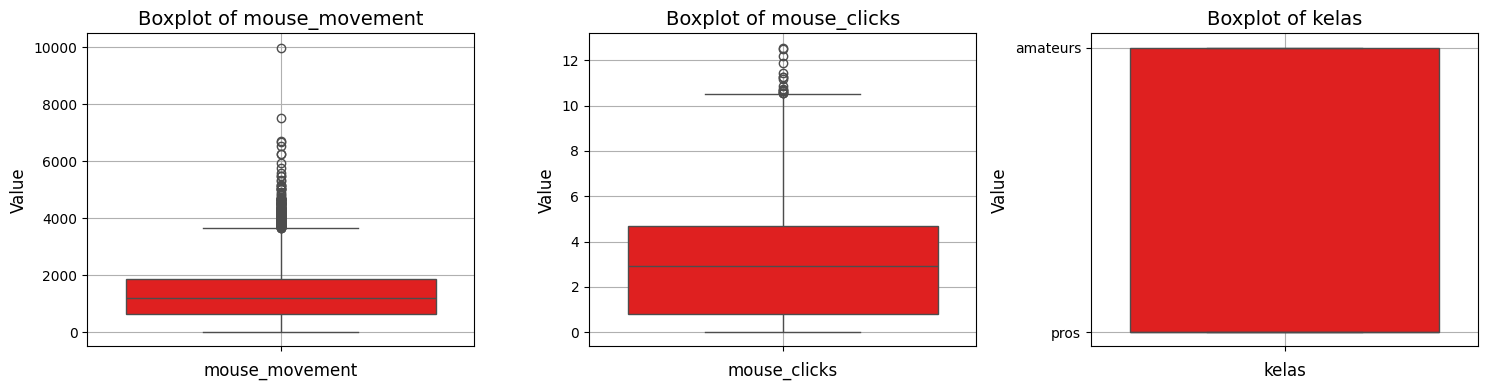

In [10]:
#Boxplot
num_features = len(df.columns)

num_cols = 4  
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

plt.figure(figsize=(num_cols * 5, num_rows * 4)) 

for i, feature in enumerate(df.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=df[feature], color='red')
    plt.title(f'Boxplot of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.grid(True)

plt.tight_layout()
plt.show()

Untuk melakukan analisis outliers, kita bisa melihat seberapa banyak outliers menggunakan grafik boxplot. Berikut adalah interpretasi tiap variabel:
1. mouse_movement: Ada sejumlah outliers (ditandai dengan titik di luar garis whisker atas atau nilai maksimum) yang memiliki nilai mouse movement yang sangat besar, yang berkisar antara 3900 hingga 10000.
2. mouse_clicks: Ada sejumlah outliers (ditandai dengan titik di luar garis whisker atas atau nilai maksimum) yang memiliki nilai mouse clicks yang berkisar antara 11 hingga 14.

Outliers harus ditangani agar model lebih akurat dan menghindari bias. Untuk itu, diperlukan teknik handling outliers seperti Winsorizing, Z-Score, dan lain sebagainya.

In [11]:
def winsorize(data, columns_to_winsorize):
 for col in columns_to_winsorize:
   if col not in data.columns or not pd.api.types.is_numeric_dtype(data[col]):
     continue
   lower_bound = data[col].quantile(0.01, interpolation= 'nearest')
   upper_bound = data[col].quantile(0.99, interpolation= 'nearest')

   data.loc[data[col] < lower_bound, col] = lower_bound
   data.loc[data[col] > upper_bound, col] = lower_bound

columns_to_winsorize = df[['mouse_movement', 'mouse_clicks']]
winsorize(df, columns_to_winsorize)

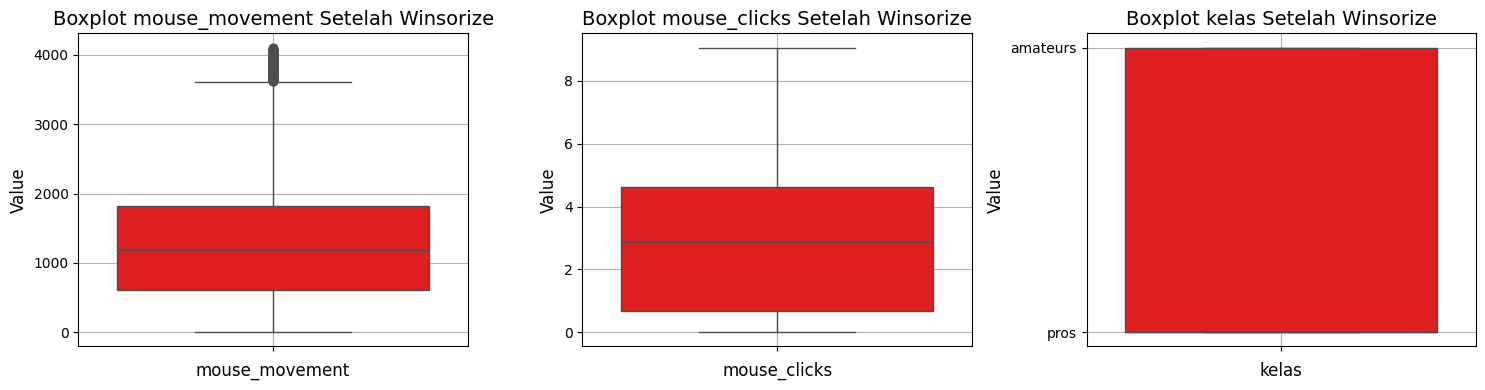

In [12]:
#Boxplot After Winsorize
num_features = len(df.columns)

num_cols = 4  
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

plt.figure(figsize=(num_cols * 5, num_rows * 4)) 

for i, feature in enumerate(df.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=df[feature], color='red')
    plt.title(f'Boxplot {feature} Setelah Winsorize', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.grid(True)

plt.tight_layout()
plt.show()

Soal 3. Lakukan analisis missing value dan berikan penjelasan dan solusi yang diperlukan

In [13]:
df.isna().sum()

mouse_movement    0
mouse_clicks      0
kelas             0
dtype: int64

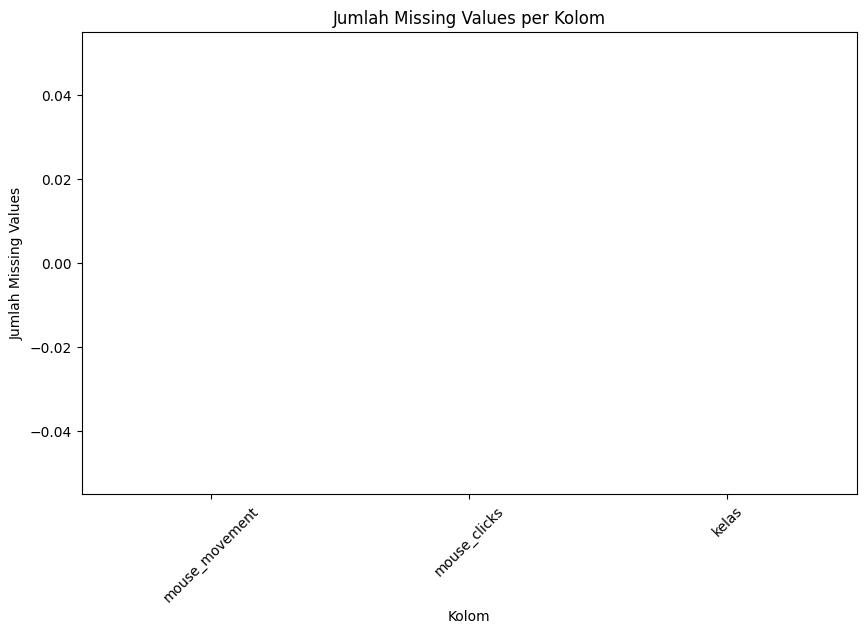

In [14]:
# Visualisasi missing values
missing_values = df.isna().sum()

plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Jumlah Missing Values per Kolom')
plt.xlabel('Kolom')
plt.ylabel('Jumlah Missing Values')
plt.xticks(rotation=45)
plt.show()

Selanjutnya, menganalisis seberapa banyak missing values yang terdapat dalam variabel menggunakan syntax df.isna().sum(). Bisa dilihat bahwa tidak terdapat missing values dalam variabel mouse_movement dan mouse_clicks. Artinya kita tidak perlu melakukan handling missing values.

Soal 4. Lakukan analisis imbalance data  dan berikan  penjelasan dan solusi jika diperlukan

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='kelas')
y = df['kelas']

# Membagi data menjadi 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Melihat jumlah data untuk mengecek imbalanced data
print("Jumlah data:")
print(y_train.value_counts())
print()

Jumlah data:
kelas
pros        4747
amateurs    3153
Name: count, dtype: int64



In [17]:
from imblearn.over_sampling import SMOTE

# Memisahkan fitur (X) dan label (y)
X = df.drop(columns=['kelas'])
y = df['kelas']

# Menggunakan SMOTE untuk oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f"Sebelum oversampling dengan SMOTE: {y_train.value_counts()}")
print(f"\nSetelah oversampling dengan SMOTE: {y_resampled.value_counts()}")

Sebelum oversampling dengan SMOTE: kelas
pros        4747
amateurs    3153
Name: count, dtype: int64

Setelah oversampling dengan SMOTE: kelas
amateurs    5925
pros        5925
Name: count, dtype: int64


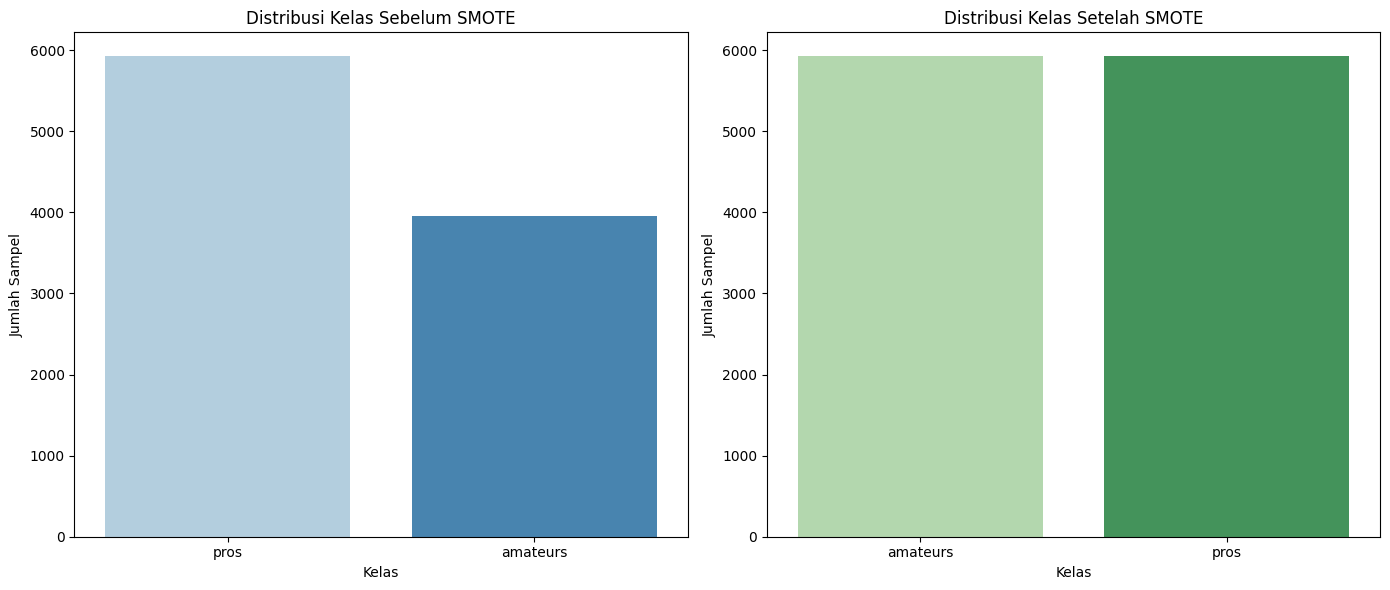

In [18]:
data_asli = y.value_counts()
sampel_data = y_resampled.value_counts()

# Membuat subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=data_asli.index, y=data_asli.values, ax=axes[0], palette='Blues')
axes[0].set_title('Distribusi Kelas Sebelum SMOTE')
axes[0].set_xlabel('Kelas')
axes[0].set_ylabel('Jumlah Sampel')

sns.barplot(x=sampel_data.index, y=sampel_data.values, ax=axes[1], palette='Greens')
axes[1].set_title('Distribusi Kelas Setelah SMOTE')
axes[1].set_xlabel('Kelas')
axes[1].set_ylabel('Jumlah Sampel')

plt.tight_layout()
plt.show()

Selanjutnya, adalah menganalisis imbalanced data target variabel kelas. Bisa dilihat bahwa kelas 'amateurs' dan 'pros' memiliki distribusi data yang tidak seimbang. Untuk itu, diperlukan handling imbalanced data menggunakan SMOTE (Synthetic Minority Over-sampling Technique) untuk menyeimbangkan distribusi data agar model dapat memprediksi target secara akurat.

Soal 5. Lakukan analisis korelasi antara variabel dan temukan variabel yang paling berpengaruh. Berikan kesimpulan hasil analisis Anda.

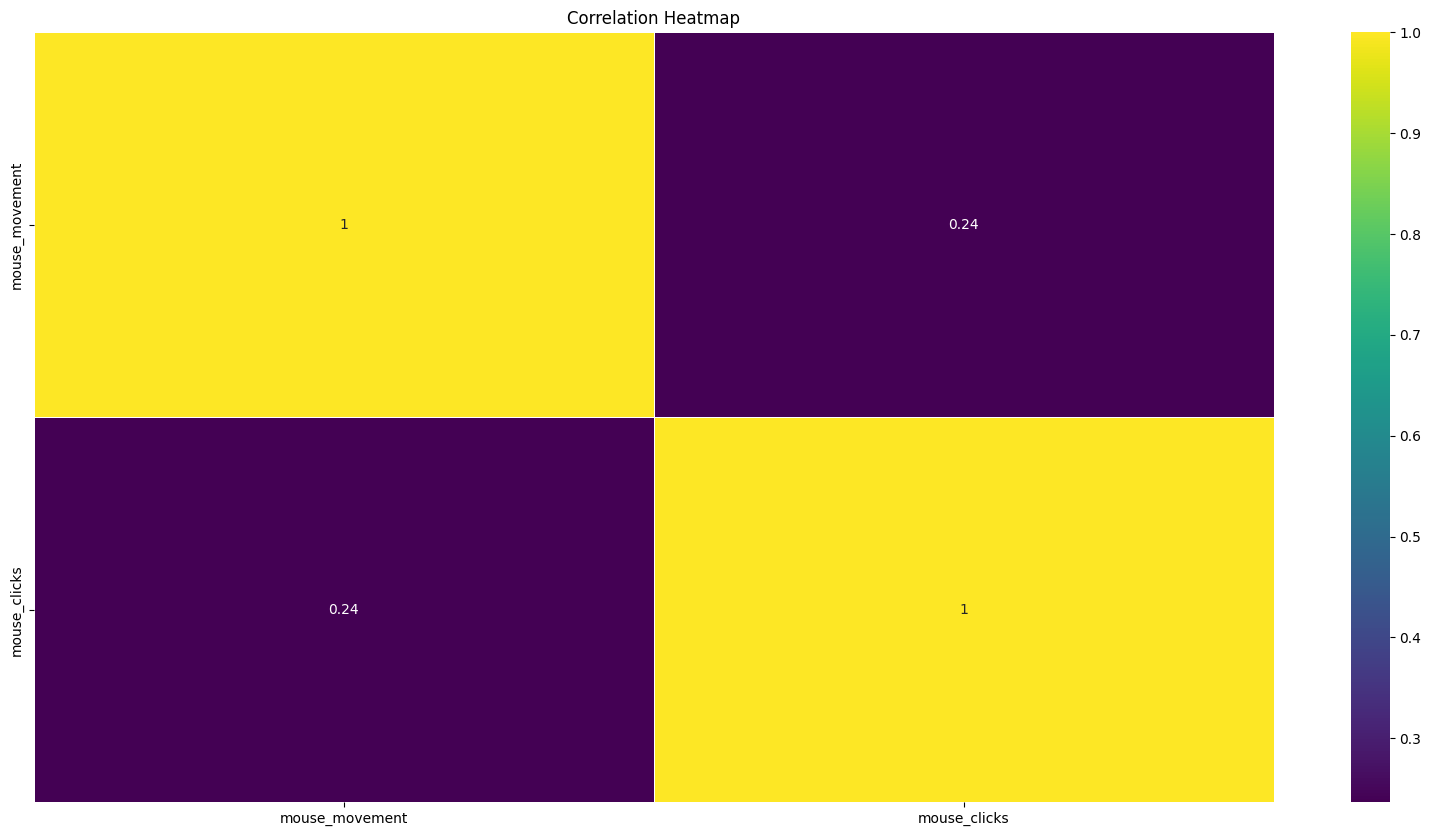

In [19]:
# Menghapus kolom 'kelas' sebelum menghitung korelasi
df_corr = df.drop(columns=['kelas']).corr()

# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(df_corr, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [20]:
# Korelasi Pearson
from scipy.stats import pearsonr

x = df['mouse_movement']
y = df['mouse_clicks']

# Hitung korelasi Pearson
corr, p_value = pearsonr(x, y)

print("Korelasi Pearson:", corr)
print("Nilai p:", p_value)

if p_value < 0.05:
    if corr > 0:
        print("Ada korelasi positif yang signifikan antara mouse movement dengan mouse clicks.")
    else:
        print("Ada korelasi negatif yang signifikan antara mouse movement dengan mouse clicks.")
else:
    print("Tidak ada korelasi yang signifikan antara mouse movement dengan mouse clicks.")

Korelasi Pearson: 0.23668860569999245
Nilai p: 8.51567998146105e-126
Ada korelasi positif yang signifikan antara mouse movement dengan mouse clicks.


Selanjutnya, melakukan analisis korelasi untuk melihat korelasi variabel. Disini saya menggunakan heatmap dan korelasi pearson untuk mengetahui nilai korelasi. Dapat disimpulkan bahwa antara variabel mouse_movement dengan mouse_clicks memiliki korelasi yang kuat yaitu sebesar 24%. 

Soal 6. Lakukan analisis data anomali dan berikan penjelasan hasil analisis Anda.

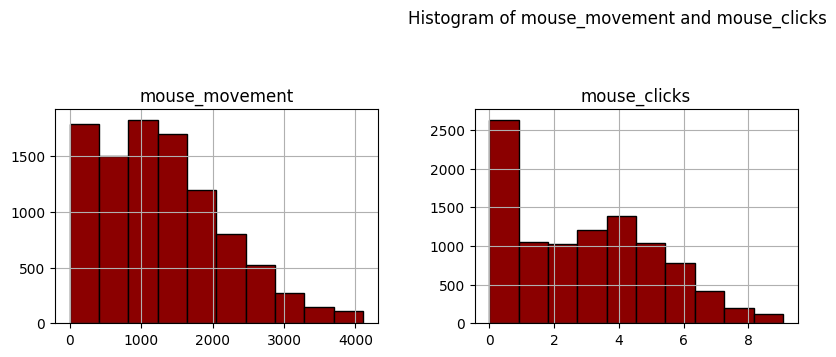

In [21]:
def plot_histograms(data):
    data.hist(bins=10, figsize=(15,10), layout=(3,3), color='darkred', edgecolor='black')
    plt.suptitle("Histogram of mouse_movement and mouse_clicks")
    plt.show()

plot_histograms(df)

In [22]:
from sklearn.preprocessing import RobustScaler

numeric_columns = ['mouse_movement', 'mouse_clicks']

scaler = RobustScaler()
numeric_scaled_array = scaler.fit_transform(df[numeric_columns])
numeric_scaled_df = pd.DataFrame(numeric_scaled_array, columns=numeric_columns)

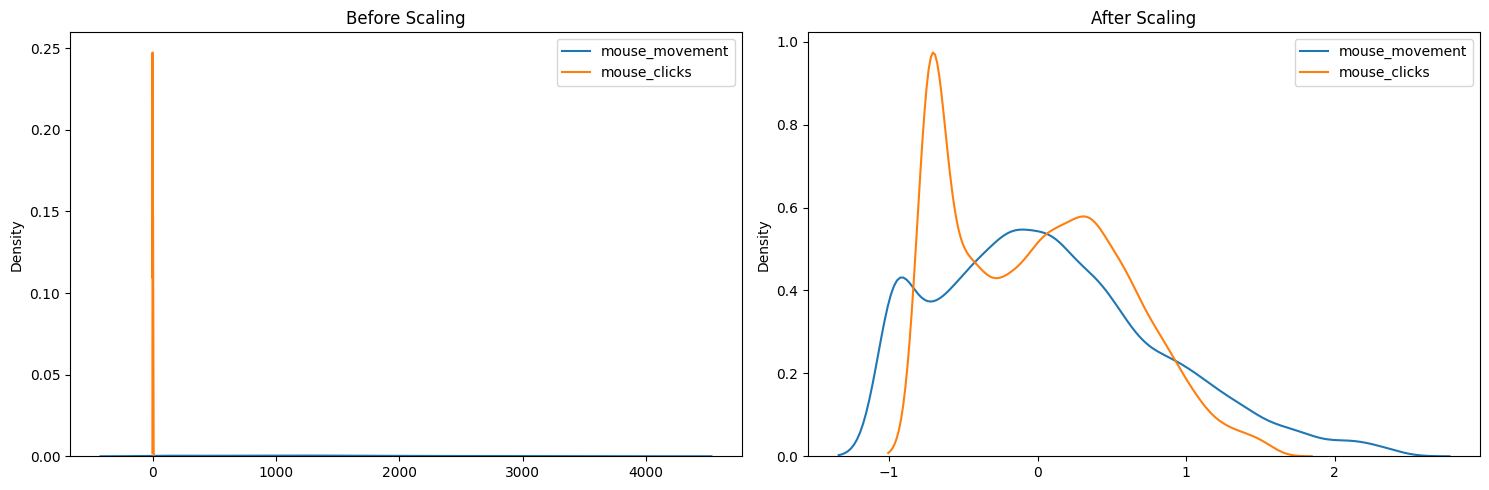

In [23]:
plt.figure(figsize=(15, 5))

# Plot Before Scaling
plt.subplot(121)
for column in numeric_columns:
    sns.distplot(df[column], hist=False, label=column)
plt.title('Before Scaling')
plt.xlabel('')
plt.legend()

# Plot After Scaling
plt.subplot(122)
for column in numeric_columns:
    sns.distplot(numeric_scaled_df[column], hist=False, label=column)
plt.title('After Scaling')
plt.xlabel('')
plt.legend()

plt.tight_layout()
plt.show()

Untuk mengindentifikasi data anomali, kita bisa menggunakan grafik histogram untuk melihat distribusi data. 
1. Histogram mouse_movement: sebagian besar data berada di rentang 0 hingga 2000, tetapi sedikit data yang berada di rentang 4000 yang dapat mengindikasikan sebagai anomali tergantung dengan konteks umumnya berada di rentang berapa.

2. Histogram mouse_clicks: sebagian besar data berada di rentang 0 hingga 4, tetapi sedikit data berada di rentang 6-8 yang dapat mengindikasikan sebagai anomali pun bergantung pada konteks umumnya.

Dalam menyelesaikan masalah rentang dari kedua variabel yang begitu jauh, kita bisa menggunakan scaling untuk mengskalakan data sehingga variasi data tidak begitu tinggi dan dapat membuat model bekerja dengan baik.